# Comparison Of All Regression Models

# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!



They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.shape

(300, 2)

In [5]:
df.columns = ['signal','density']

### Data Visualization

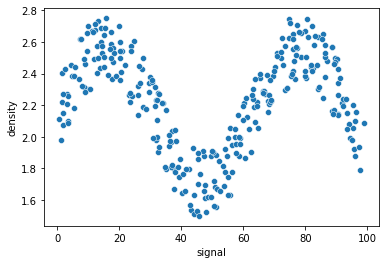

In [6]:
sns.scatterplot(x='signal',y='density',data=df);

### Selecting Feature

In [7]:
X = df['signal'].values.reshape(-1,1)

In [8]:
X.shape

(300, 1)

In [9]:
y = df['density']

### Train | Test Split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=101)

### Linear Regression

.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_pred = lr_model.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(lr_pred,y_test))

0.2570051996584629

In [16]:
y.mean()

2.2250629493237963

In [17]:
0.25/2.225*100

11.235955056179774

In [18]:
y_test[:10]

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
Name: density, dtype: float64

In [19]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [20]:
signal_range = np.arange(1,100).reshape(-1,1)

In [21]:
signal_pre = lr_model.predict(signal_range)

### Visualization Of Linear Regression Model

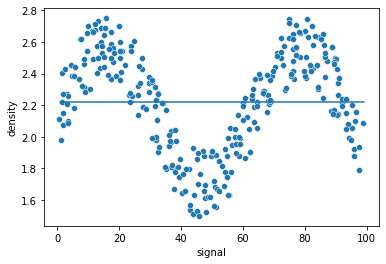

In [22]:
sns.scatterplot(x='signal',y='density',data=df);
plt.plot(signal_range,signal_pre );

### Function To show Visualization Model Accuracy

.

In [23]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    
    
    model_predict = model.predict(X_test)
    MAE = mean_absolute_error(model_predict,y_test)
    MSE = np.sqrt(mean_squared_error(model_predict,y_test))
    print(f'MAE : {MAE}\n')
    print(f'MSE : {MSE}\n')
    
    plt.figure(figsize=(6,4),dpi=150)
    signal_range = np.arange(1,100)
    signal_pre  = model.predict(signal_range.reshape(-1,1))
    sns.scatterplot(x='signal',y='density',data=df,color = 'black');
    plt.plot(signal_range,signal_pre)
    plt.show()

### Linear Regression Model

.

MAE : 0.211198973318633

MSE : 0.2570051996584629



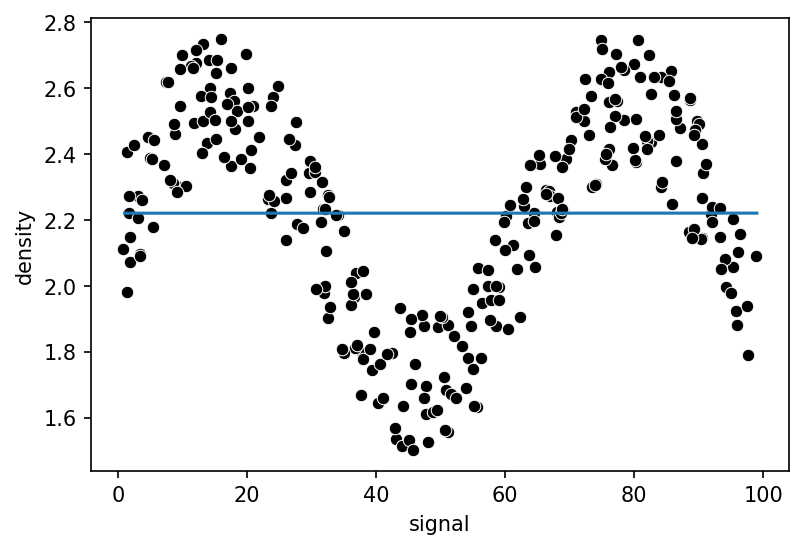

In [24]:
run_model(lr_model,X_train,y_train,X_test,y_test)

### Polynomial Regression

.

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression()) 

MAE : 0.11969085253552043

MSE : 0.13807383449323551



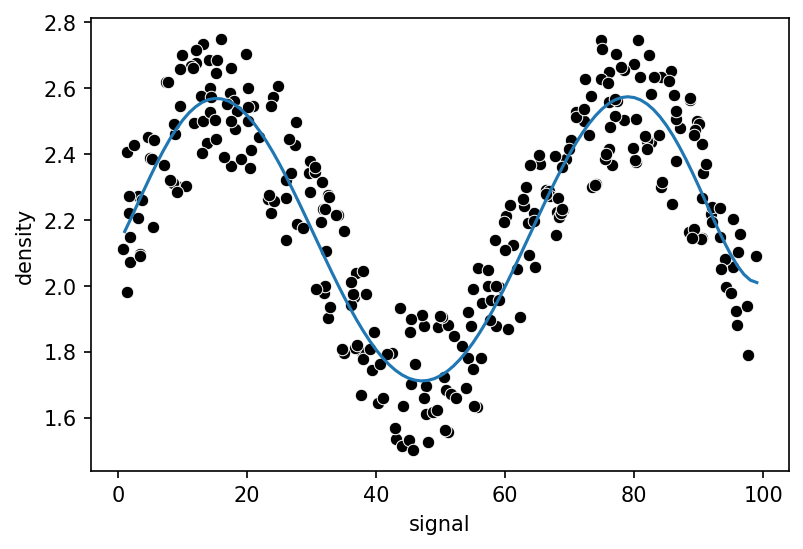

In [27]:
run_model(pipe,X_train,y_train,X_test,y_test)

### K Neighbor Regression Model 

.

In [28]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378

MSE : 0.1523487028635337



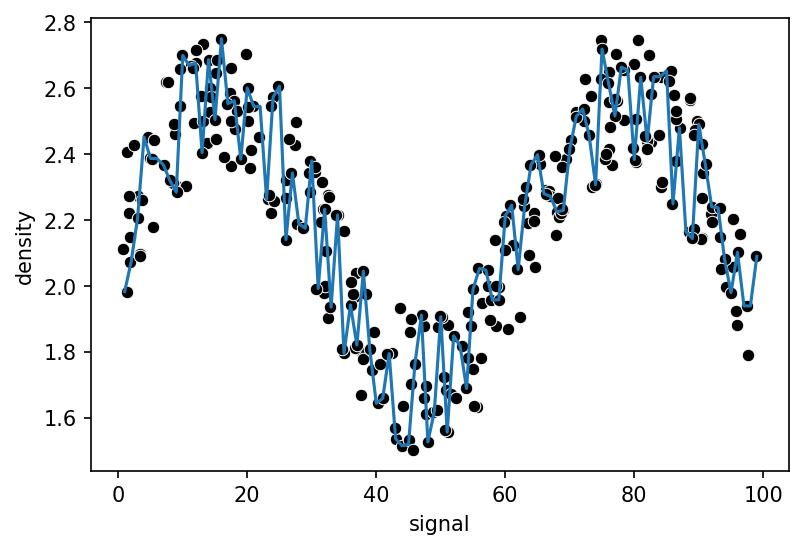

MAE : 0.12198383614100558

MSE : 0.13730685016923647



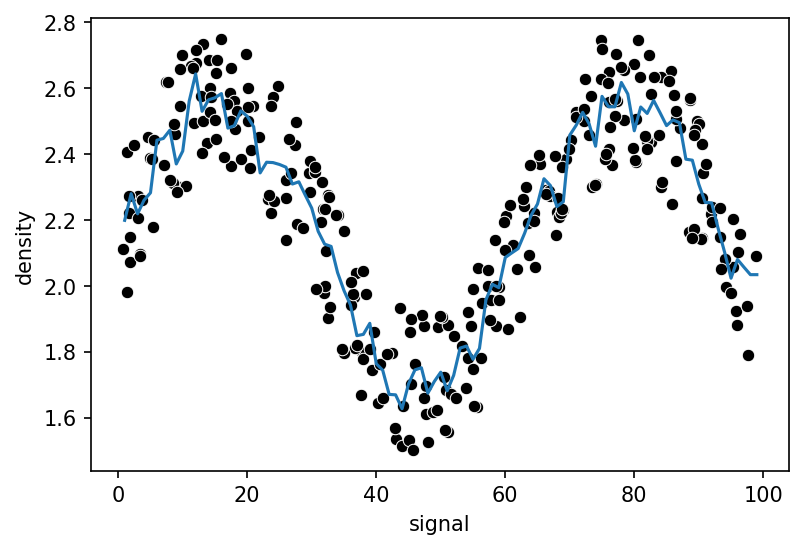

MAE : 0.11635971693292672

MSE : 0.13277855732740926



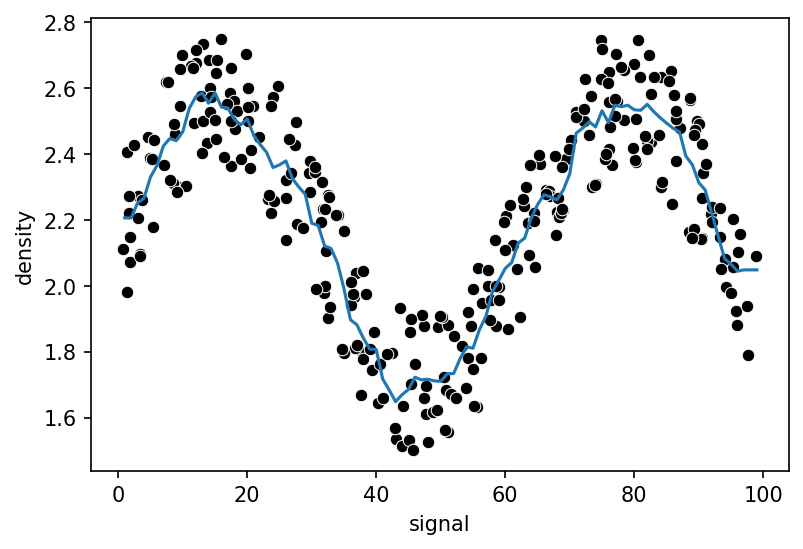

MAE : 0.1207030971917154

MSE : 0.1397499127378895



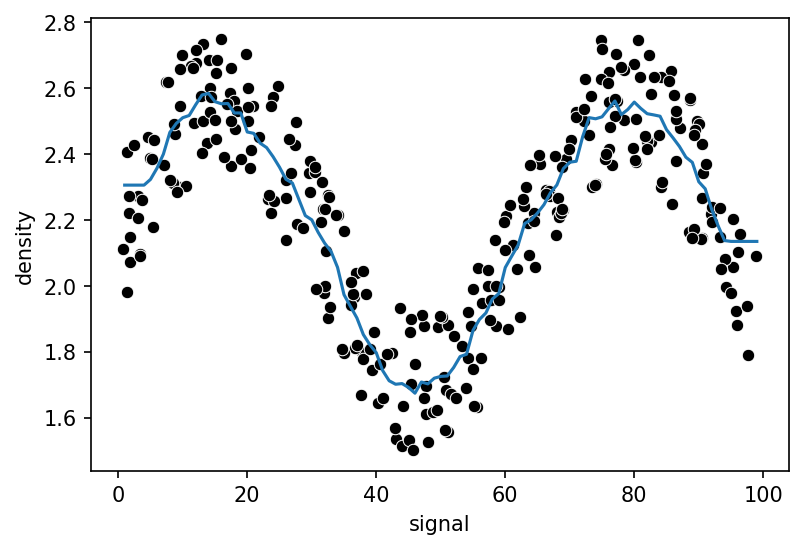

MAE : 0.13363165935705318

MSE : 0.15954234753677107



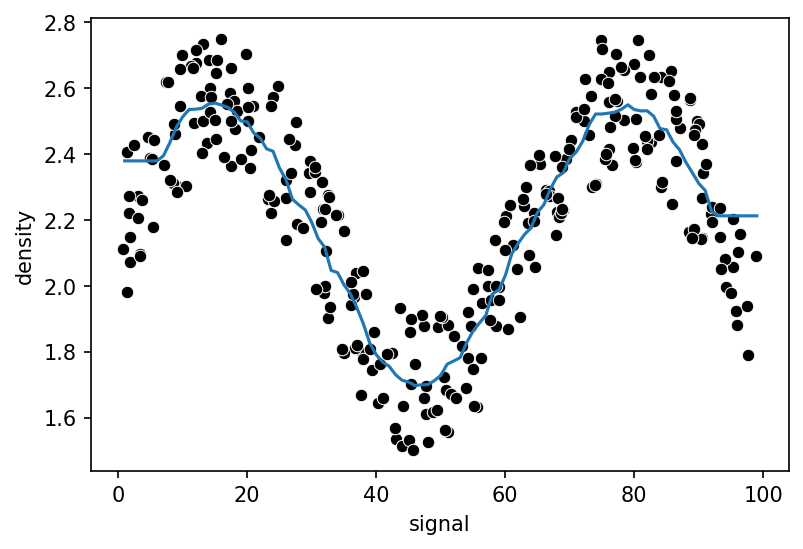

In [29]:
k_values = [1,5,10,20,30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    

In [30]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378

MSE : 0.1523487028635337



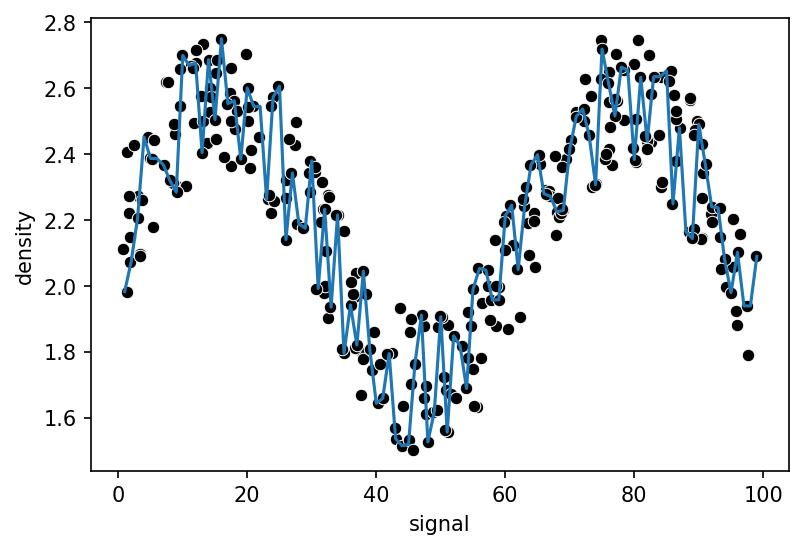

In [31]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

### Support Vector Regression Model

.

In [32]:
from sklearn.svm import SVR

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
svr = SVR()

param_grid = {'C':[0.01,0.1,1,5,10,100,100],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid=param_grid)

MAE : 0.12017510123813938

MSE : 0.13498358709618385



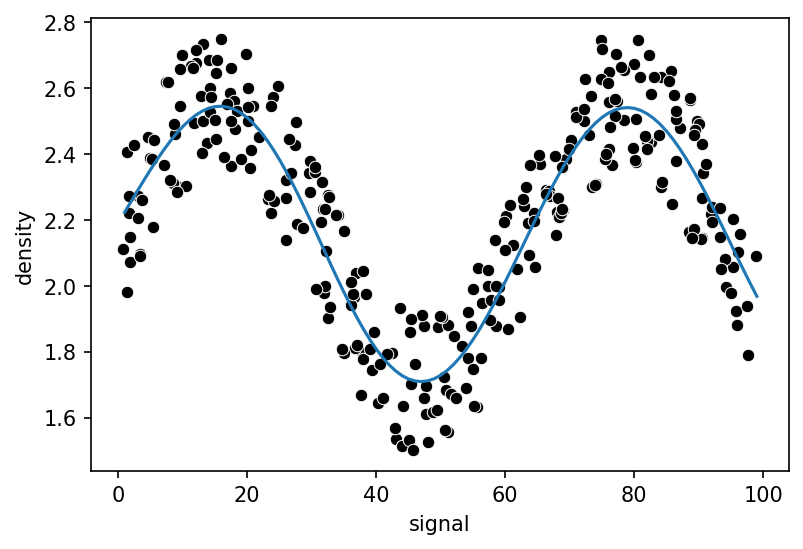

In [35]:
run_model(svr,X_train,y_train,X_test,y_test)

### Random Forest Regressor

.

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.12136584307117777

MSE : 0.14389841609424037



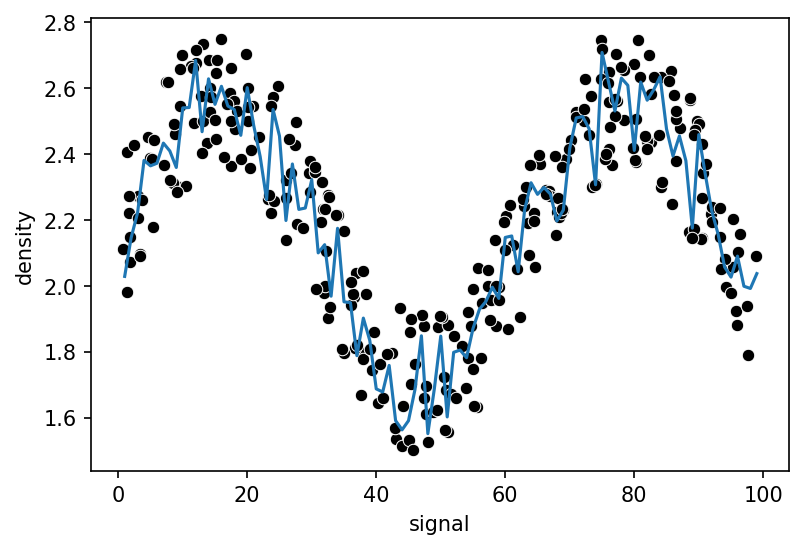

In [38]:
run_model(rfr,X_train,y_train,X_test,y_test)

### Gradient Boosting Regressor

.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE : 0.11318284854800689

MSE : 0.13294148649584667



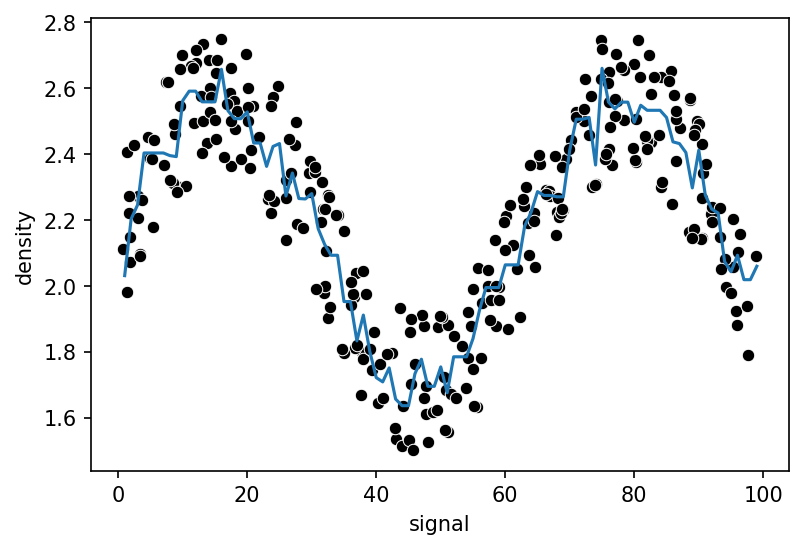

In [40]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

### AdaBoostRegressor

.

MAE : 0.12317902175719803

MSE : 0.140974630915765



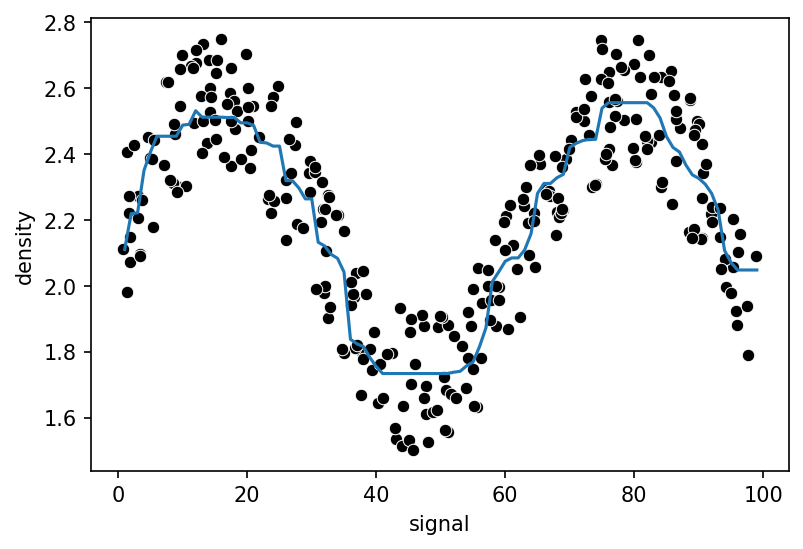

In [41]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

-----